In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

rng = np.random.default_rng(seed=25)

In [2]:
# Utils
def get_true_action_reward(k: int):
    return rng.normal(0, 5, (k,1))


def get_noisy_reward(r: float):
    return rng.normal(r, 1)


def epsilon_greedy_action(epsilon: float, q: np.ndarray) -> int:
    """
    returns index of action to be taken with epsilon-greedy policy
    """
    if rng.random() < epsilon:
        return rng.integers(0, len(q))
    else:
        return q.argmax(axis=0)[0]

    
def get_dynamic_epsilon(step: int, min_epsilon: float = 0.01, alpha: float = 2/3) -> float:
    return max(1 / (step + 1) ** alpha, min_epsilon)
    

In [3]:
# Parameters
k = 10    # Number of actions
n_sim = 2000
n_steps = 2000
epsilons = [0, 0.01, 0.05, 0.1]
min_epsilon = 0.01
alpha = 2/3

In [4]:
# Fixed epsilon
avg_rewards = []
q_star = get_true_action_reward(k)
for epsilon in epsilons:
    collected_reward = np.empty((n_sim, n_steps))
    for i in tqdm(range(n_sim)): 
        Q = np.zeros((k,1))
        cont = np.ones((k,1))
        
        # Use this for a different approach:
        # q_star = get_true_action_reward(k)
        
        for j in range(n_steps):
            optimal_action = epsilon_greedy_action(epsilon, Q)
            r = q_star[optimal_action]
            r_noise = get_noisy_reward(r)
            
            # Update Q
            Q[optimal_action] = Q[optimal_action]+1/cont[optimal_action]*(r_noise-Q[optimal_action])
            cont[optimal_action] += 1
            collected_reward[i,j] = r_noise
    avg_reward = collected_reward.mean(axis=0)
    avg_rewards.append(avg_reward)

100%|██████████| 2000/2000 [01:18<00:00, 25.50it/s]


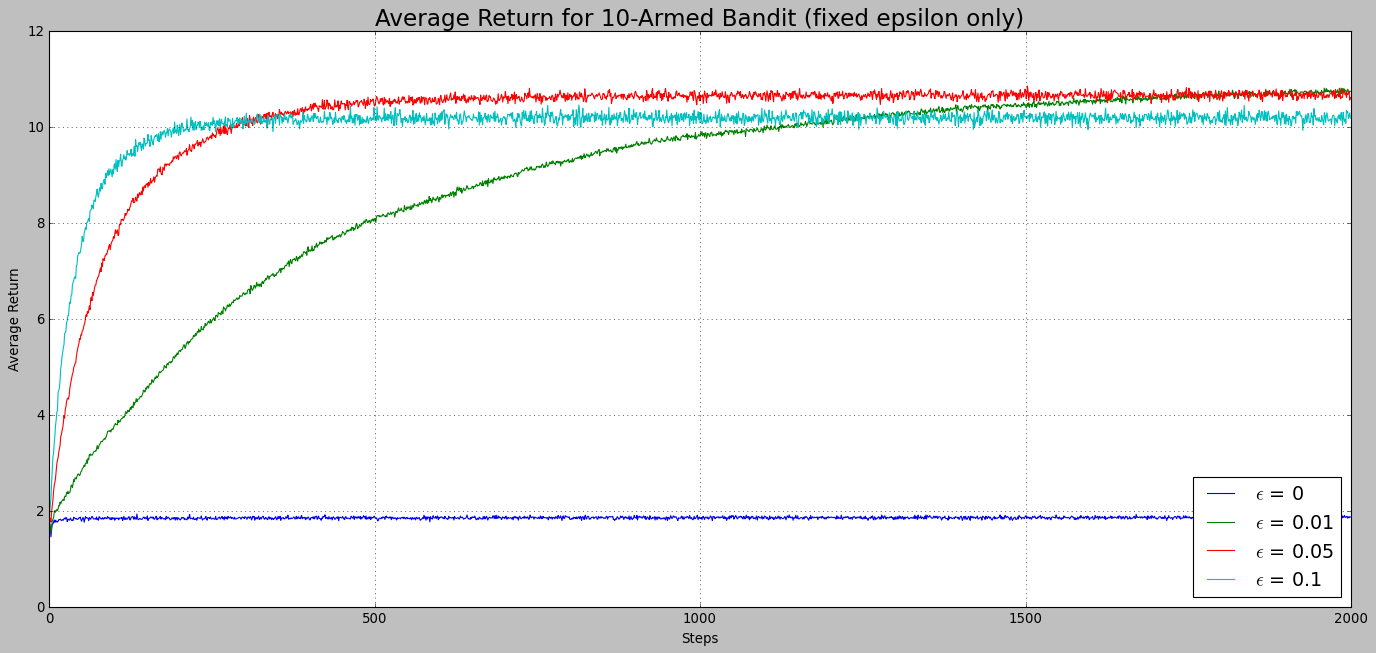

In [5]:
# Save and show results
plt.style.use("classic")
plt.figure(figsize=(21, 9))
for avg_reward, epsilon in zip(avg_rewards, epsilons):
    plt.plot(avg_reward, label='$\epsilon$ = '+str(epsilon))
plt.legend(fontsize='x-large', loc='lower right')
plt.title(f'Average Return for {k}-Armed Bandit (fixed epsilon only)', fontsize="xx-large")
plt.xlabel('Steps')
plt.ylabel('Average Return')
plt.grid()
# plt.savefig(f'{k}-armed_bandit.png')
plt.show();

In [6]:
# Dynamic epsilon approach
collected_reward = np.empty((n_sim, n_steps))
for i in tqdm(range(n_sim)): 
    Q = np.zeros((k,1))
    cont = np.ones((k,1))
    
    # Use this for a different approach:
    # q_star = get_true_action_reward(k)
    
    for j in range(n_steps):
        epsilon = get_dynamic_epsilon(j, min_epsilon, alpha)    # Explore more at the beginning
        optimal_action = epsilon_greedy_action(epsilon, Q)
        r = q_star[optimal_action]
        r_noise = get_noisy_reward(r)
        
        # Update Q
        Q[optimal_action] = Q[optimal_action]+1/cont[optimal_action]*(r_noise-Q[optimal_action])
        cont[optimal_action] += 1
        collected_reward[i,j] = r_noise
dynamic_avg_reward = collected_reward.mean(axis=0)


100%|██████████| 2000/2000 [01:22<00:00, 24.12it/s]


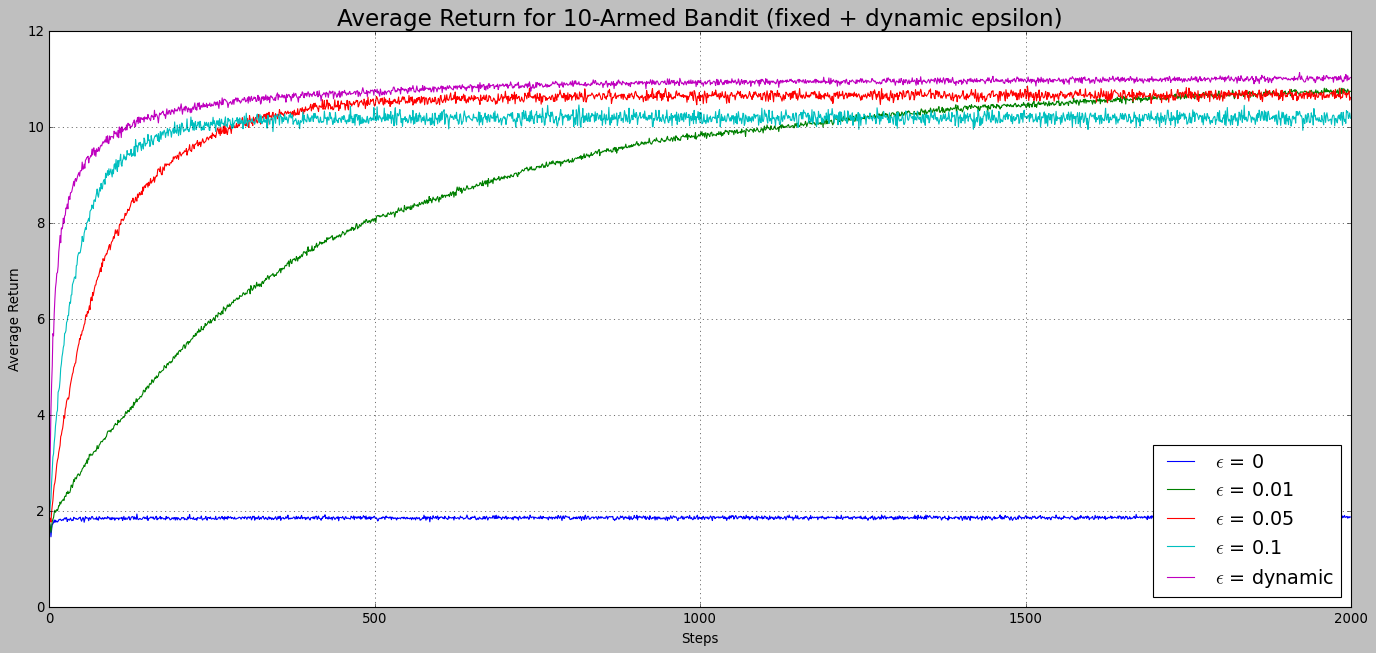

In [7]:
# Save and show results
plt.figure(figsize=(21, 9))

# Static epsilon
for avg_reward, epsilon in zip(avg_rewards, epsilons):
    plt.plot(avg_reward, label='$\epsilon$ = '+str(epsilon))
    
# Dynamic epsilon
plt.plot(dynamic_avg_reward, label="$\epsilon$ = dynamic")

plt.legend(fontsize='x-large', loc='lower right')
plt.title(f'Average Return for {k}-Armed Bandit (fixed + dynamic epsilon)', fontsize="xx-large")
plt.xlabel('Steps')
plt.ylabel('Average Return')
plt.grid()
plt.savefig(f'{k}-armed_bandit.png')
plt.show();